<a href="https://colab.research.google.com/github/rodrigomouracbs/Machine-Learning/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Machine Learning - Regressão Linear**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly
plotly.offline.init_notebook_mode()
import datetime

In [ ]:
dataset = pd.read_csv('/content/petr4.csv')

In [ ]:
#Transformando a coluna Date em uma coluna do tipo Datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:
#Visualizando os dados
dataset.tail()

,Date,Open,High,Low,Close,Volume
1797,2010-01-08,37.16,37.39,36.86,36.95,14624200
1798,2010-01-07,37.27,37.45,37.07,37.15,10964600
1799,2010-01-06,36.80,37.50,36.80,37.50,18720600
1800,2010-01-05,37.38,37.43,36.80,37.00,21396400
1801,2010-01-04,36.95,37.32,36.82,37.32,13303600


In [ ]:
#Variação entre o preço de abertura e fechamento
dataset['Variation'] = dataset['Close'].sub(dataset['Open'])

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Variation
0,2017-04-11,14.97,14.99,14.55,14.68,38392300,-0.29
1,2017-04-10,14.90,14.94,14.70,14.94,37541700,0.04
2,2017-04-07,14.61,14.90,14.60,14.70,32944900,0.09
3,2017-04-06,14.62,14.87,14.42,14.53,34386000,-0.09
4,2017-04-05,15.05,15.16,14.50,14.57,49623400,-0.48


**Visualização dos dados**

In [ ]:
#Configuração necessária para plotar no google colab
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
#Plota o valor dos preços no período analisado 2010 a 2017
#Utiliza a biblioteca pyplot para plotar dados financeiros temporais
%matplotlib inline
x1 = dataset.Date
y1 = dataset.Close
data = [go.Scatter(x=x1, y=y1)]
layout = go.Layout(xaxis=dict(range=['01-01-2010', '11-04-2017'],
                              title='Ano'),
                   yaxis=dict(range=[min(x1), max(y1)],
                              title='Valor da Ação'
                              ))
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)
plt.show()

**Preços de 7 dias atrás - Mostra Candlestick**

In [ ]:
#Visualizando os Candlesticks
dataset2 = dataset.head(7)
dados = go.Candlestick(x=dataset2.Date,
                       open=dataset2.Open,
                       high=dataset2.High,
                       low=dataset2.Low,
                       close=dataset2.Close,showlegend=True)
data = [dados]
py.offline.iplot(data,filename='gráfico_candlestick')

**Candles dos últimos 6 meses**

In [ ]:
#Visualizando preços em formato de candles dos últimos 6 meses
dataset2=dataset.head(180)
dados = go.Candlestick(x=dataset2.Date,
                       open=dataset2.Open,
                       high=dataset2.High,
                       low=dataset2.Low,
                       close=dataset2.Close,showlegend=True)
data = [dados]
py.offline.iplot(data,filename='gráfico_candlestick')

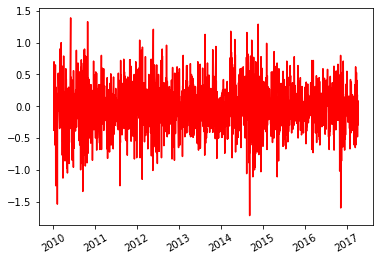

In [ ]:
#Plota a variação no período
%matplotlib inline
import matplotlib.dates as mdates
import datetime as dt
x = dataset['Date']
y = dataset['Variation']
plt.plot_date(x,y, color = 'r', fmt='r-')
plt.xticks(rotation=30)
plt.show()

**Correlação de Features e classe**
1.   **Classe - Variável observada**
2.   **Feature - Variável estimadora**



In [ ]:
#Cria uma variável chamada treino
treino = dataset

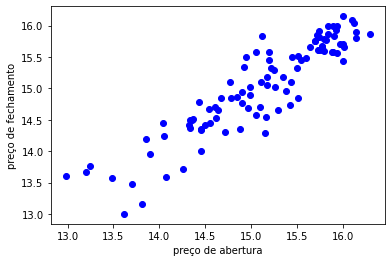

In [ ]:
#Plota a dispersão entre o preço de abertura (Open) e fechamento (Close) dos últimos 100 dias
%matplotlib inline
x = treino.Open[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preço de abertura')
plt.ylabel('preço de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

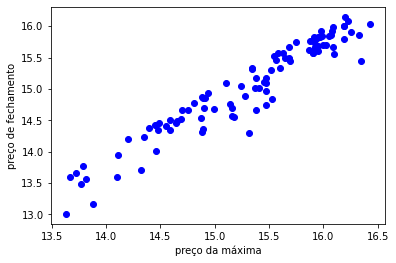

In [ ]:
#Plota a dispersão entre o preço de máxima (high) e fechamento (Close) dos últimos 100 dias
%matplotlib inline
x = treino.High[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preço da máxima')
plt.ylabel('preço de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show() 

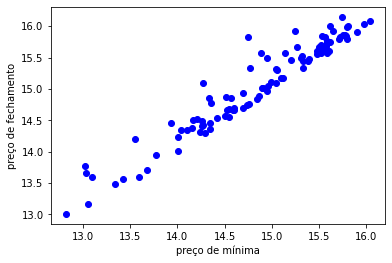

In [ ]:
#Plota a dispersão entre o preço da mínima(Low) e fechamento (Close) dos últimos 100 dias.
%matplotlib inline
x = treino.Low[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preço de mínima')
plt.ylabel('preço de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show() 

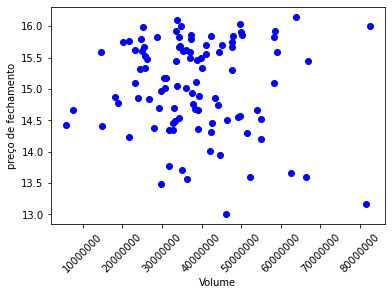

In [ ]:
#Plota a dispersão entre o volume e fechamento (Close) dos últimos 100 dias
%matplotlib inline
x = treino.Volume[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('Volume')
plt.ylabel('preço de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.ticklabel_format(style='plain', axis='x')
plt.autoscale('False')
plt.xticks(rotation=45)
plt.show() 

**Separação dos dados de treino e a classe**

In [ ]:
#Variáveis do modelo
features = ['Open', 'High', 'Low', 'Volume']
treino = treino[features]

In [ ]:
#Visualizando os dados sem as classes
treino.head()

,Open,High,Low,Volume
0,14.97,14.99,14.55,38392300
1,14.90,14.94,14.70,37541700
2,14.61,14.90,14.60,32944900
3,14.62,14.87,14.42,34386000
4,15.05,15.16,14.50,49623400


In [ ]:
#Y recebe o preço de fechamento (classes)
y = dataset['Close']

In [ ]:
#Visualizando o dataframe Y
y

0       14.68
1       14.94
2       14.70
3       14.53
4       14.57
        ...  
1797    36.95
1798    37.15
1799    37.50
1800    37.00
1801    37.32
Name: Close, Length: 1802, dtype: float64

#Treinando o algoritmo de regressão linear
1.   **Divisão dos dados de forma aleatória (75% para treino e 25% para teste)**

In [ ]:
#Separando os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(treino, y, random_state=42)

In [ ]:
#Visualizando o dataframe 
X_treino.head()

,Open,High,Low,Volume
585,14.20,14.62,13.33,54167400
163,12.19,12.37,12.07,53317800
1593,27.35,27.64,27.21,32455000
1133,21.44,21.54,21.14,22808700
266,8.09,8.17,7.72,76508100


In [ ]:
X_teste.head()

,Open,High,Low,Volume
1791,35.90,36.67,35.77,23168400
322,6.76,6.82,6.62,40463400
1033,17.55,17.74,17.38,30634800
162,12.31,12.56,12.14,48078700
1273,22.95,23.93,22.83,36725000


In [ ]:
y_treino.head()

585     13.44
163     12.31
1593    27.50
1133    21.23
266      8.12
Name: Close, dtype: float64

In [ ]:
y_teste.head()

1791    36.55
322      6.79
1033    17.74
162     12.49
1273    23.88
Name: Close, dtype: float64

In [ ]:
#Cria um objeto do tipo Linear Regression
lr_model = LinearRegression()

In [ ]:
#Treinando o algoritmo
lr_model.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Visualizando os coeficientes
lr_model.coef_

array([-6.88569830e-01,  7.56540314e-01,  9.33134403e-01,  7.75093101e-10])

In [ ]:
#Predizendo 10 preços
lr_model.predict(X_teste)[:10]

array([36.40282357,  6.69755743, 17.56221729, 12.37534075, 23.61722772,
       14.66679251,  9.58837485, 15.85914839, 28.61967737, 18.67014871])

In [ ]:
#Visualizando preços observados
y_teste[:10]

1791    36.55
322      6.79
1033    17.74
162     12.49
1273    23.88
70      14.78
247      9.69
736     16.03
1518    28.71
1006    18.53
Name: Close, dtype: float64

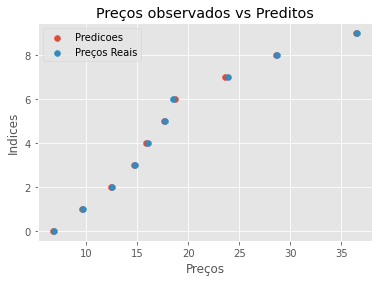

In [ ]:
%matplotlib inline
#Armazena dados preditos em dataframe
predicoes = pd.DataFrame(lr_model.predict(X_teste)[:10])

#Armazena dados reais em dataframe
y_teste2 = pd.DataFrame(y_teste[:10].values)

#Define o estilo do gráfico
plt.style.use('ggplot')

#Definição de título de eixos do gráfico
plt.xlabel('Preços')
plt.ylabel('Indices')
plt.title('Preços observados vs Preditos')

#Ordena os valores e plota as linhas
plt.scatter(predicoes.sort_values(by=0),predicoes.index)
plt.scatter(y_teste2.sort_values(by=0), y_teste2.index)

#Define Legenda do gráfic
plt.legend(['Predicoes', 'Preços Reais'])

# **Validando o modelo de regressão**

In [ ]:
y_teste.isnull().sum() #Verifica se existem valores nulos no conjunto de teste

0

In [ ]:
y_pred = lr_model.predict(X_teste)

In [ ]:
y_pred.shape

(451,)

In [ ]:
y_teste.shape

(451,)

In [ ]:
#mean squared error - valor ideal: 0
mean_squared_error(y_teste, lr_model.predict(X_teste)) 

In [ ]:
mean_squared_error(y_teste, y_pred) 

0.02446206458052582

In [ ]:
# RMSE - Root Mean Square Error
# Utiliza unidades dependentes
RMSE = mean_squared_error(y_teste, lr_model.predict(X_teste))**0.5
RMSE

# **É possível melhorar o modelo?**
1.   Testando com as features Open e High
2.   Normalização dos dados



In [ ]:
lr_model2 = LinearRegression(normalize=True)

In [ ]:
features = ['Open','High']
treino2 = treino[features]

In [ ]:
treino2.head()

,Open,High
0,14.97,14.99
1,14.90,14.94
2,14.61,14.90
3,14.62,14.87
4,15.05,15.16


In [ ]:
#Separa os dados 75% treino e 25% teste
X_treino, X_teste, y_treino, y_teste = train_test_split(treino2, y, random_state=42)

In [ ]:
#Treina o algoritmo
lr_model2.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
#Imprime os pesos
lr_model2.coef_

array([-0.16069271,  1.15300407])

In [ ]:
#Valida o modelo com RMSE
RMSE = mean_squared_error(y_teste, lr_model2.predict(X_teste))**0.5
RMSE

0.2425628923636513

In [ ]:
#Valida o modelo com MSE
MSE = mean_squared_error(y_teste, lr_model2.predict(X_teste))
MSE

0.058836756751820284